## LDA analysis with scikit-Learn digits data

In [61]:
# Importing libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### 1. Loading digits dataset from scikit learn

In [84]:
digits = sklearn.datasets.load_digits()

In [85]:
X = digits.data
Y = digits.target

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Fit Logistic regression with raw data

In [87]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [88]:
labels = pd.Series(classifier.classes_)

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm,columns=labels, index=labels)) # this is get the label names in CM
print('Accuracy: ' + str(abs(accuracy_score(y_test, y_pred))))

    0   1   2   3   4   5   6   7   8   9
0  45   0   0   0   0   0   0   0   0   0
1   0  49   0   0   0   0   0   0   2   1
2   0   2  49   2   0   0   0   0   0   0
3   0   0   0  52   0   0   0   0   1   1
4   0   0   0   0  47   0   0   1   0   0
5   0   0   0   0   0  55   0   0   0   2
6   0   1   0   0   0   0  59   0   0   0
7   0   0   0   1   1   0   0  51   0   0
8   0   3   1   0   0   0   0   0  53   4
9   0   0   0   0   0   1   0   0   1  55
Accuracy: 0.9537037037037037


In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 2. Perform a LDA analysis

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

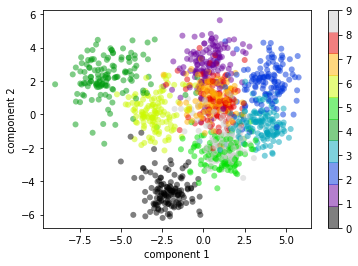

In [102]:
plt.scatter(X_train[:, 0], X_train[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

#### 3. Fit Logistic regression with LDA components

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [104]:
labels = pd.Series(classifier.classes_)

In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm,columns=labels, index=labels)) # this is get the label names in CM
print('Accuracy: ' + str(abs(accuracy_score(y_test, y_pred))))

    0   1   2   3   4   5   6   7   8   9
0  45   0   0   0   0   0   0   0   0   0
1   0  42   1   0   0   0   3   5   1   0
2   0   4  35  11   0   0   0   1   1   1
3   0   0   1  47   0   0   0   0   1   5
4   0   0   0   0  44   0   4   0   0   0
5   0   0   0   4   0  37   1   0   0  15
6   0   1   0   0   5   0  53   0   0   1
7   0   8   1   0   1   0   5  29   6   3
8   0   9   0   0   0   0   1  33  12   6
9   0   0   0   7   0  26   0   4   1  19
Accuracy: 0.6722222222222223
